<a href="https://colab.research.google.com/github/3arbie/appli/blob/master/idaeas_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install bert

In [0]:
import bert 

In [1]:
!pip install pipenv

     |████████████████████████████████| 5.2MB 2.8MB/s 
     |████████████████████████████████| 2.0MB 36.1MB/s 


NLP part 

geometric model estimate of GBM model


In [2]:
!pip install pymc3 

In [4]:
!pip install arviz

     |████████████████████████████████| 1.3MB 2.8MB/s 
     |████████████████████████████████| 4.1MB 37.3MB/s 
     |████████████████████████████████| 307kB 41.3MB/s 


In [0]:
import warnings

import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
from numpy import ndarray

In [0]:
%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

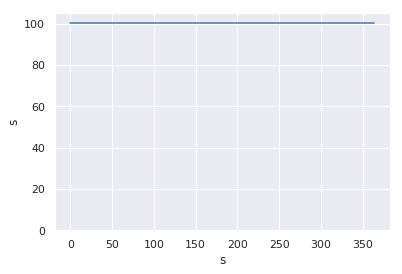

In [15]:
np.random.seed(42)
#just example of parameters that we will take
mu = 0.0
sigma = 0.15
I=1000
def gbm(S0, mu, sigma, maturity,I):
  dt=maturity/I
  S=S0*np.exp((mu - .5*sigma**2)*dt + (sigma)*np.sqrt(dt)*np.random.standard_normal(I))
  return S.mean()

example_data = pd.DataFrame({
    'day': np.arange(365),
    's': gbm(100, mu, sigma, 365, I=1000)})

_ = sns.lineplot(x='day', y='s', data=example_data)

returns_geo_full = (
    np.log(example_data.s)
    .diff(1)
    .dropna())

_ = sns.distplot(returns_geo_full)

In [30]:
!pip install requests

In [20]:
!pip install pandas_datareader 

In [0]:
from pandas_datareader import  data
d=data.DataReader('MSFT', 'yahoo')
d['Return']=np.log(d['Close']/d['Close'].shift(1))
d_ret=d['Return']
std=d['Return'].std()

In [0]:
import tensorflow_probability 
from tensorflow_probability import  edward2 as ed2
N=d.shape[0]
prior_vol=ed2.HalfNormal(scale=tf.constant(std, shape=[N]))
prior_mean=ed2.Normal(loc=tf.zeros(N), scale=tf.constant(0.015, shape=[N]))
likelihood=ed2.Normal(loc=prior_mean, scale=prior_vol)

In [0]:
import tensorflow as tf
N=d.shape[0]
X=tf.placeholder(tf.float32, shape=(d.shape[0],))

In [0]:
def normal_jump(I_sim, T, S0, *args, **kargs):
    dt=T/I_sim
    mu=args[0]; sigma=args[1]; _lambda=args[2]; mu_Y=args[3]; sigma_Y=args[4]
    M=np.zeros((I_sim, T))
    for t in range(1, T):
        jumppnbr = np.random.poisson(_lambda*dt, size=I_sim)
        jump = np.random.normal(mu_Y*(jumppnbr - _lambda*dt), np.sqrt(jumppnbr)*sigma_Y) 
        M[:, t] = mu*dt + sigma*np.sqrt(dt)*np.random.standard_normal(I_sim) + jump
    S=S0*np.exp(M).mean(axis=1)
    return S

In [84]:
normal_jump(1000, 100, 110.00, 0, 0.15, 10, 0.03, 0.001)

array([111.14910524, 111.00212544, 110.96282678, 110.27197611,
       110.94257036, 110.57908262, 109.66725415, 109.79941491,
       110.10571215, 110.44098976, 109.9947575 , 109.28473233,
       108.52985176, 109.81792378, 109.45132302, 109.184756  ,
       110.17748838, 110.53826932, 110.2126779 , 110.75704762,
       110.0903345 , 109.09930862, 109.72332288, 109.55861998,
       109.15568037, 109.94699498, 110.55704712, 109.86439249,
       109.68432478, 110.05561302, 110.03031904, 109.46505564,
       110.5867081 , 110.65637436, 110.36022428, 111.11793872,
       110.72363973, 110.28544558, 109.0942495 , 109.89233416,
       110.49681123, 109.7663149 , 110.24366756, 109.09012291,
       110.07925068, 110.35590477, 109.0611914 , 110.32487196,
       110.17978114, 110.46260971, 110.36982658, 110.49130956,
       109.34090166, 111.07944354, 110.97943702, 111.02237275,
       110.53007033, 110.57690851, 109.97478769, 109.47410487,
       108.67336538, 109.81941928, 110.13873373, 110.37